In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#**DATA PREPROCESSING** 

In [ ]:
## Reading the train data
df=pd.read_csv(r'train.csv')

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df.shape

(54808, 14)

In [ ]:
## Finding the null values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

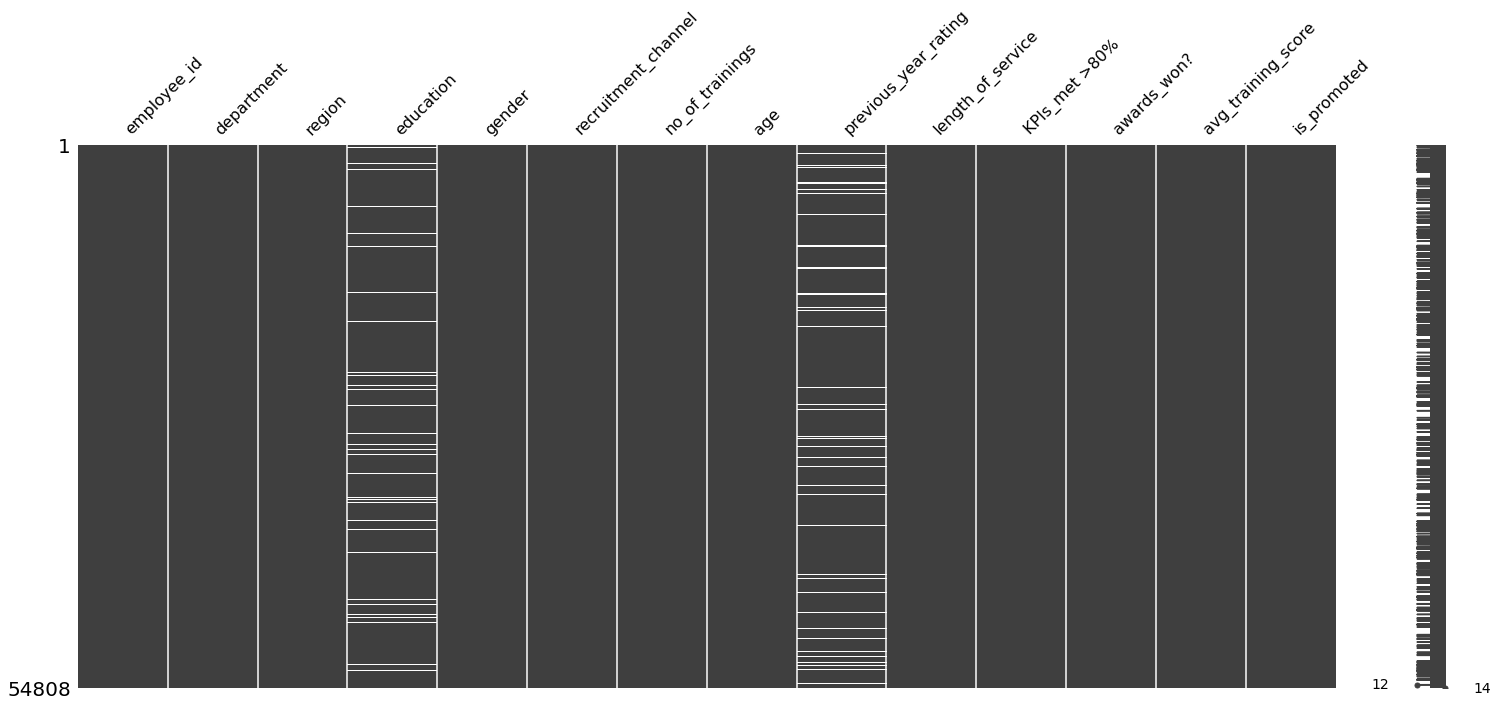

In [ ]:
import missingno as mn
mn.matrix(df)

In [ ]:
df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [ ]:
## Finding the median of this column
median=df['previous_year_rating'].median()
median

3.0

In [ ]:
## NUll Imputation of this column, by filling the null values with the median 
df['previous_year_rating_median']=df['previous_year_rating'].fillna(median)
df['previous_year_rating_median']

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating_median, Length: 54808, dtype: float64

In [ ]:
## Checking whether their are still null values or not is this column
df['previous_year_rating_median'].isnull().sum()

0

In [ ]:
## Null Imputation of this column, by adding the NaN value with the mode
df['education_mode']=df['education'].fillna(df['education'].mode()[0])

In [ ]:
## Checking all the unique values of this column
df['education_mode'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating_median
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170,3.304481
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137,1.214770
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,3.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,4.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,5.000000


In [ ]:
## Checking the dublicates in the column employee_id
df.employee_id.duplicated().sum()

0

In [ ]:
df.nunique()

employee_id                    54808
department                         9
region                            34
education                          3
gender                             2
recruitment_channel                3
no_of_trainings                   10
age                               41
previous_year_rating               5
length_of_service                 35
KPIs_met >80%                      2
awards_won?                        2
avg_training_score                61
is_promoted                        2
previous_year_rating_median        5
education_mode                     3
dtype: int64

In [ ]:
## Dropping this column as it is the primary key, so all the values are unique
df1=df.drop('employee_id',axis=1)

In [ ]:
df1.isnull().sum()

department                        0
region                            0
education                      2409
gender                            0
recruitment_channel               0
no_of_trainings                   0
age                               0
previous_year_rating           4124
length_of_service                 0
KPIs_met >80%                     0
awards_won?                       0
avg_training_score                0
is_promoted                       0
previous_year_rating_median       0
education_mode                    0
dtype: int64

In [ ]:
## Checking the columns of dataframe df1
df1.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'previous_year_rating_median', 'education_mode'],
      dtype='object')

In [ ]:
## Copying the int and float type columns into another datframe, so as to do EDA on these
df2=df1[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
        'previous_year_rating_median']]


# ***EDA***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


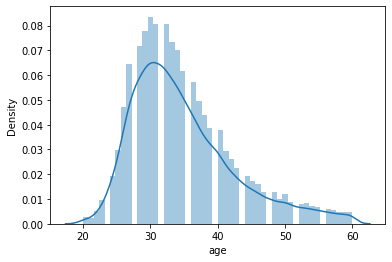

In [ ]:
sns.distplot(df2.age)    ##Right skewed...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


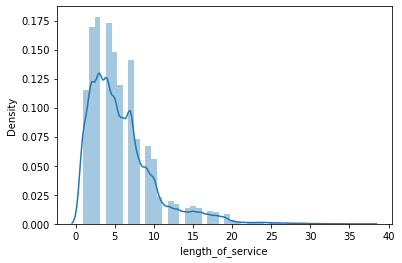

In [ ]:
sns.distplot(df2.length_of_service)    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


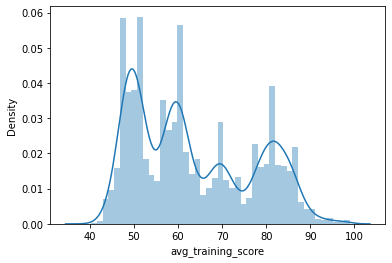

In [ ]:
sns.distplot(df2['avg_training_score'])

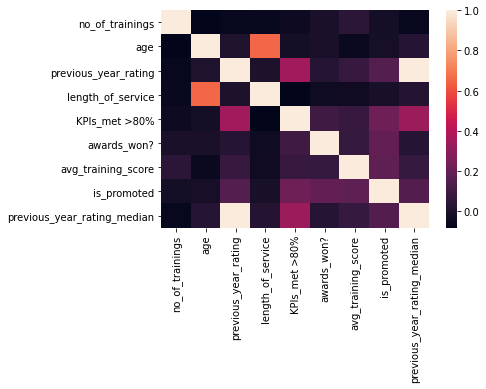

In [ ]:
sns.heatmap(df2.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


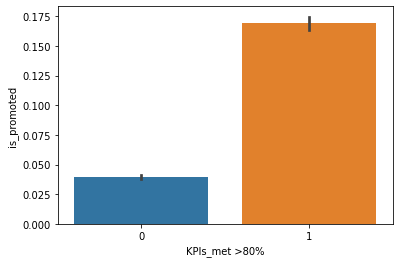

In [ ]:
sns.barplot(df2['KPIs_met >80%'],df2.is_promoted);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


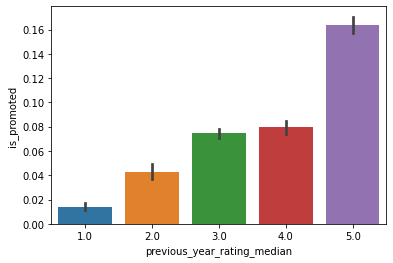

In [ ]:
sns.barplot(df2['previous_year_rating_median'],df2.is_promoted);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


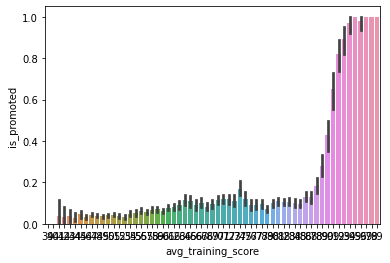

In [ ]:
sns.barplot(df2['avg_training_score'], df2.is_promoted);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


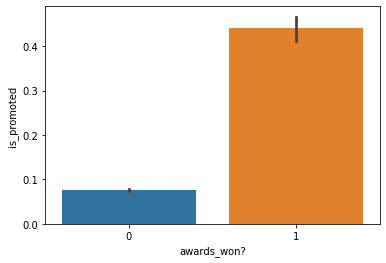

In [ ]:
sns.barplot(df2['awards_won?'], df2.is_promoted);

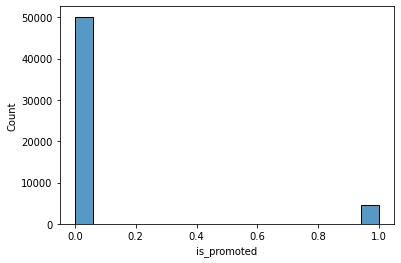

In [ ]:
sns.histplot(df2.is_promoted)

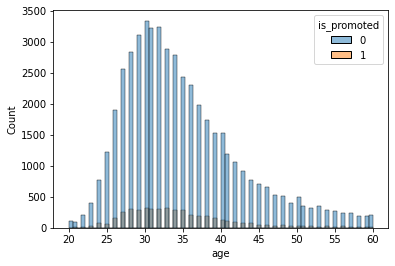

In [ ]:
sns.histplot(data=df2, x="age", hue="is_promoted")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


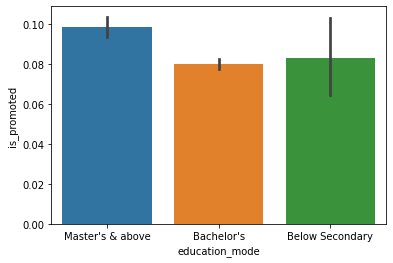

In [ ]:
sns.barplot(df1['education_mode'],df1['is_promoted'])

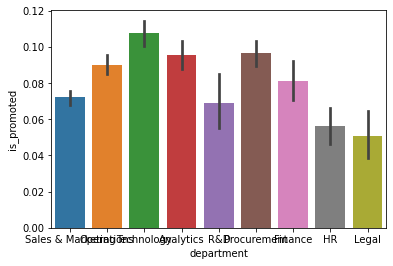

In [ ]:
sns.barplot(data=df1,x='department',y='is_promoted')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


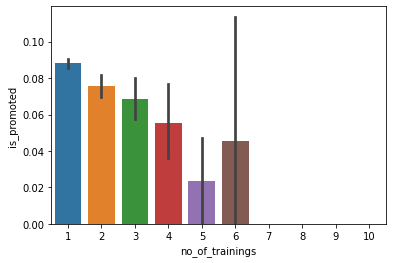

In [ ]:
sns.barplot(df1['no_of_trainings'],df1['is_promoted'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


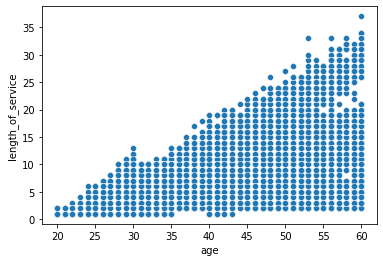

In [ ]:
sns.scatterplot(df1['age'],df1['length_of_service'])

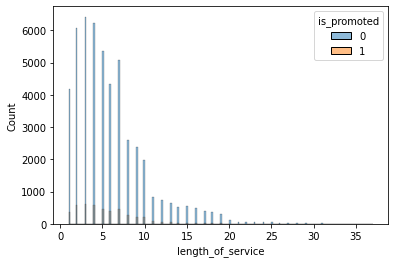

In [ ]:
sns.histplot(data=df2, x="length_of_service", hue="is_promoted")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


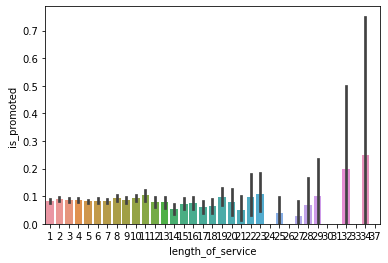

In [ ]:
sns.barplot(df1.length_of_service,df1.is_promoted)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc8709ea910>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc8709ac790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8709b47d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8709b4290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc8709a4cd0>,
  <matplotlib.lines.Line2D at 0x7fc8709ac250>]}

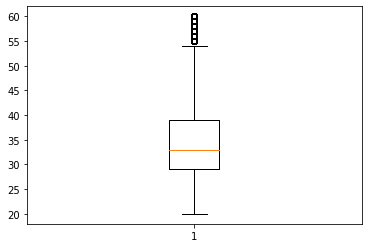

In [ ]:
plt.boxplot(df1['age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fc87096d810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc8708df890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8708e98d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8708e9390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc8708dcdd0>,
  <matplotlib.lines.Line2D at 0x7fc8708df350>]}

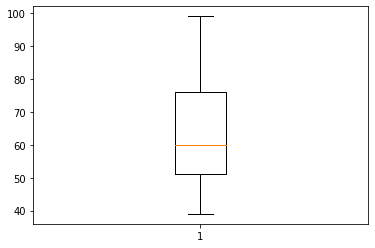

In [ ]:
plt.boxplot(df1['avg_training_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


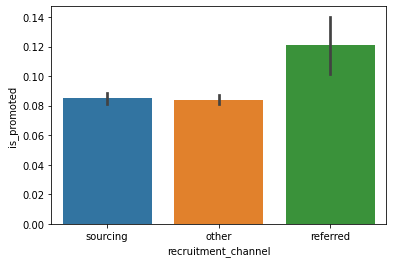

In [ ]:
sns.barplot(df1.recruitment_channel,df1.is_promoted)

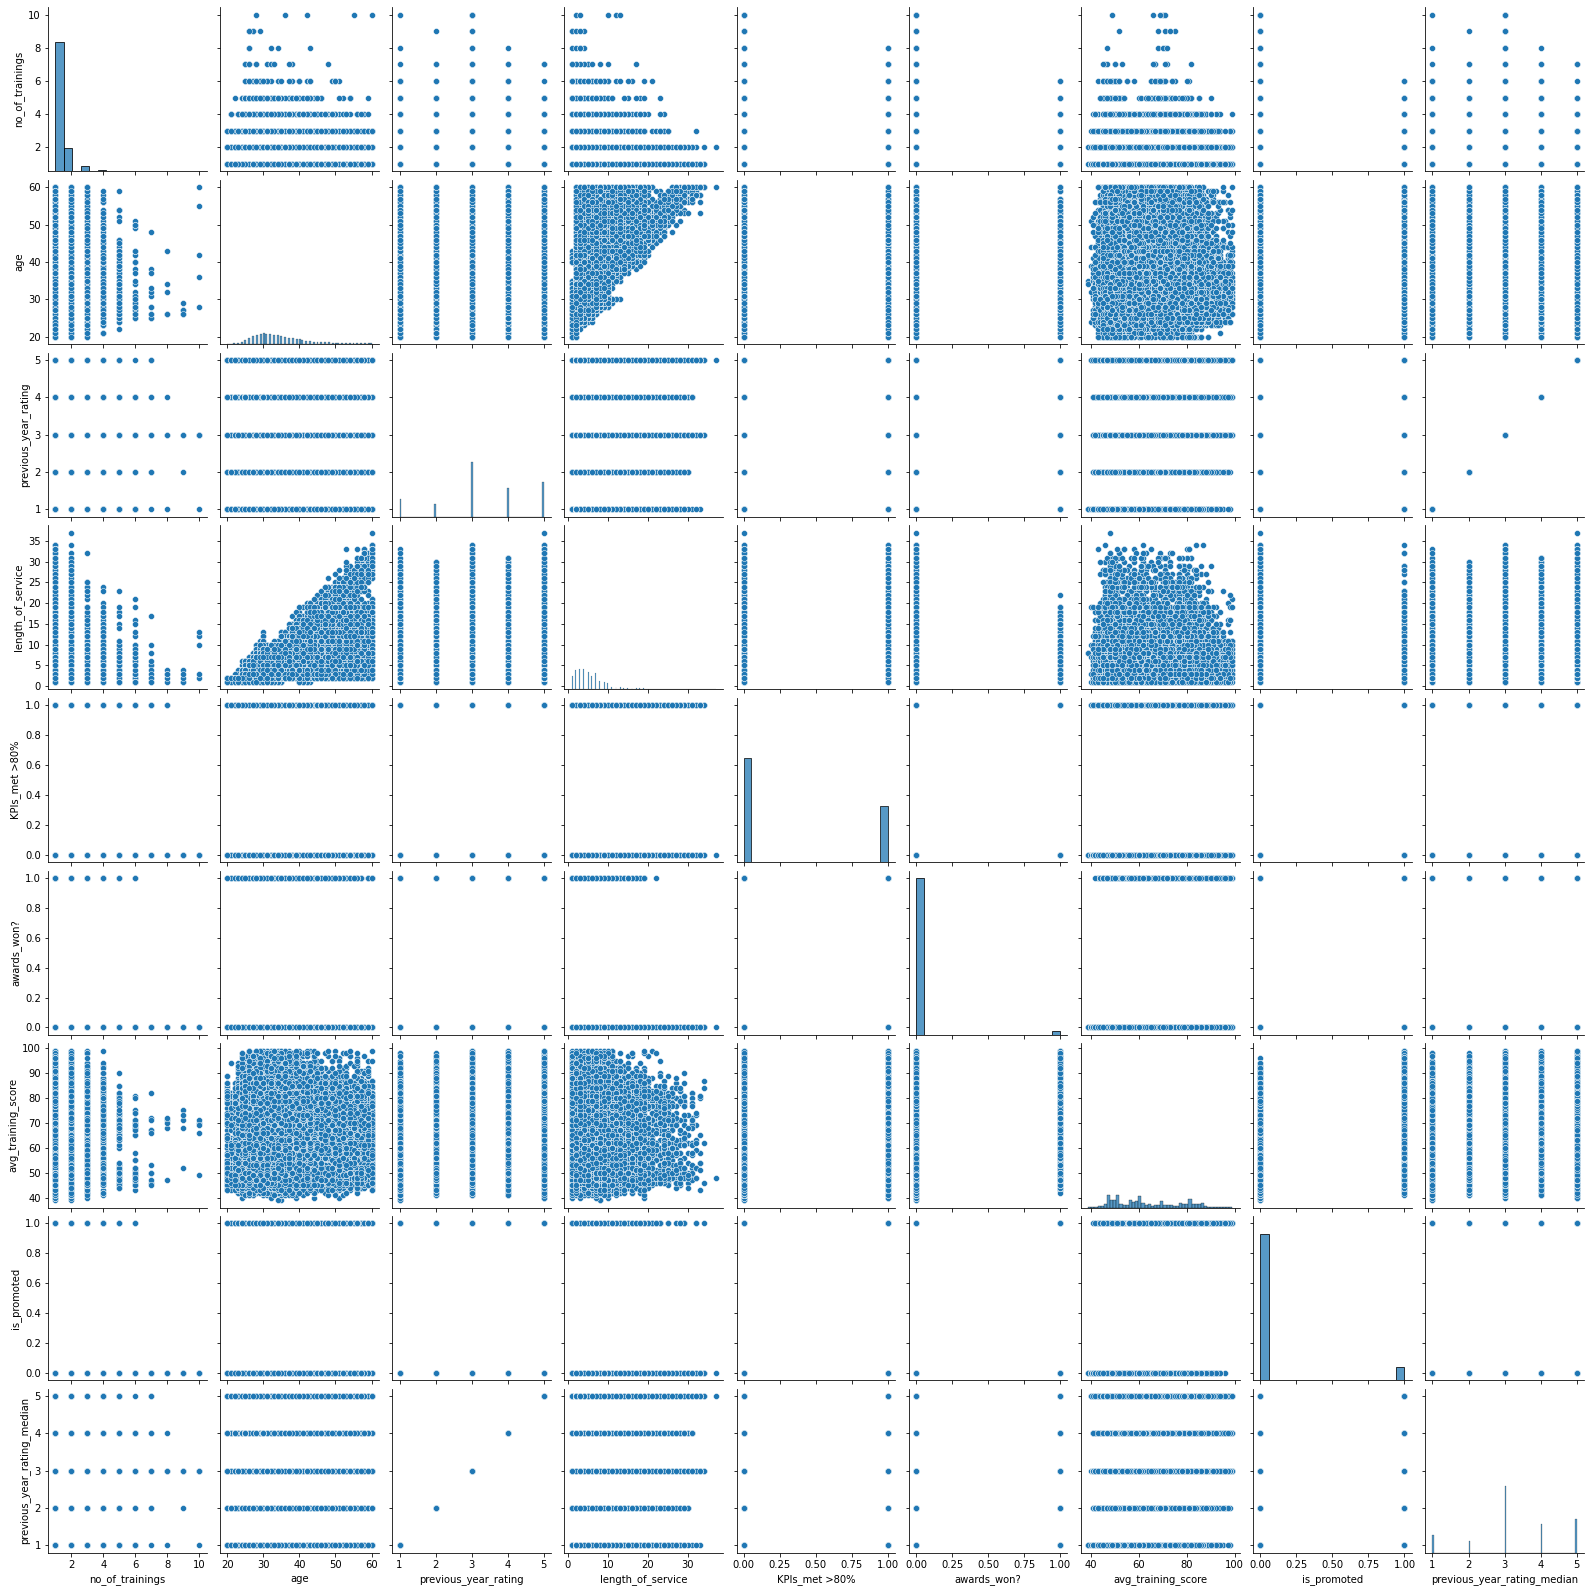

In [ ]:
sns.pairplot(df1)

#***FEATURE ENGINEERING AND SELECTION***

In [ ]:
## One Hot Encoding of all the categorical columns
df3 = pd.concat([df1[['no_of_trainings','age','previous_year_rating_median','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']],
               pd.get_dummies(df1['gender'],drop_first = True),pd.get_dummies(df1['education_mode'],drop_first = True),pd.get_dummies(df1['recruitment_channel'],
               drop_first = True),pd.get_dummies(df1['department'],drop_first = True),pd.get_dummies(df1['region'],drop_first = True)],axis=1)

In [ ]:
df3.head()

,no_of_trainings,age,previous_year_rating_median,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,m,Below Secondary,Master's & above,referred,sourcing,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,1,35,5.0,8,1,0,49,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,30,5.0,4,0,0,60,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,34,3.0,7,0,0,50,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,39,1.0,10,0,0,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,45,3.0,2,0,0,73,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3.shape

(54808, 54)

In [ ]:
## Separating the target variable from the rest of the data
X=df3.drop(['is_promoted'],axis=1)
y=df3['is_promoted']

###***TRAIN-TEST DATA SPLIT***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)

In [ ]:
X_train.head()

,no_of_trainings,age,previous_year_rating_median,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,m,Below Secondary,Master's & above,referred,sourcing,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,1,35,5.0,8,1,0,49,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,30,5.0,4,0,0,60,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,34,3.0,7,0,0,50,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,39,1.0,10,0,0,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,45,3.0,2,0,0,73,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Checking the train data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38365 entries, 0 to 38364
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   no_of_trainings              38365 non-null  int64  
 1   age                          38365 non-null  int64  
 2   previous_year_rating_median  38365 non-null  float64
 3   length_of_service            38365 non-null  int64  
 4   KPIs_met >80%                38365 non-null  int64  
 5   awards_won?                  38365 non-null  int64  
 6   avg_training_score           38365 non-null  int64  
 7   m                            38365 non-null  uint8  
 8   Below Secondary              38365 non-null  uint8  
 9   Master's & above             38365 non-null  uint8  
 10  referred                     38365 non-null  uint8  
 11  sourcing                     38365 non-null  uint8  
 12  Finance                      38365 non-null  uint8  
 13  HR              

In [ ]:
## Finding the correlation between between the columns and our target variable
s=(X_train.merge(y_train , on = X_train.index ).corr())
print(s)

                                key_0  no_of_trainings  ...  region_9  is_promoted
key_0                        1.000000        -0.002929  ... -0.006177    -0.003538
no_of_trainings             -0.002929         1.000000  ...  0.003304    -0.024949
age                         -0.001655        -0.082399  ... -0.059383    -0.015084
previous_year_rating_median -0.006450        -0.060359  ... -0.031423     0.155043
length_of_service           -0.004234        -0.059114  ... -0.037828    -0.004653
KPIs_met >80%                0.001522        -0.044567  ... -0.033112     0.221794
awards_won?                 -0.001346        -0.009839  ... -0.005611     0.187342
avg_training_score          -0.006032         0.047304  ... -0.013740     0.176082
m                           -0.004975         0.083864  ...  0.043327    -0.012203
Below Secondary             -0.002058         0.001330  ... -0.010641    -0.004065
Master's & above            -0.004643        -0.031047  ... -0.003265     0.030920
refe

#Now, I use Filter Method to choose the features, by seeing the above correlation of the columns with the target variable.

#***MODELLING***

In [ ]:
##Using the SMOTE which is an oversampling method on train data to overcome 
## the overfitting problem posed by random oversampling.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smotes, y_smotes = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In total, I used three models:
1. Firstly, I used the RandomForest Classifier to train our model. In this model, I got the F1 Score of 0.305.
2. Then, I used Bagging model which is a boosting algorithm and in this model, I got the F1 score of 0.399.
3. After that,I used Gradient Booster Classifier, which gives me the F1 score of 0.485.

In all three above models, I performed Hyperparamatric Tuning, and from these three, I get the best results in the last one i.e, Gradient Boosting Classifier

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
## Training the model without passing any parameters  using gradient boosting classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_smotes, y_smotes)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = gb_clf.predict(X_test)

In [ ]:
f1_score(y_test, y_pred, zero_division=1)

0.39041794087665643

In [ ]:
###Searching the best parameters to hypertune the model using grid search cv with a 3 fold cross validation strategy.
from sklearn.model_selection import GridSearchCV
param_test2b = {
  'max_depth': range(3,10,2),
  'n_estimators':[150,200,300,400], 
  'subsample':[0.7,0.8],
  'learning_rate':[0,1.0,0.2]
    
}
gsearch2b = GridSearchCV(estimator = GradientBoostingClassifier( learning_rate=0.1, n_estimators=150, max_depth=5,
 subsample=0.8), 
 param_grid = param_test2b, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2b.fit(X_smotes, y_smotes)
# print(gsearch2b.grid_scores_)
print("gsearch2b.best_params_",gsearch2b.best_params_)
print("gsearch2b.best_score_",gsearch2b.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


gsearch2b.best_params_ {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.8}
gsearch2b.best_score_ 0.9444425499413841


In [ ]:
###Train the model with the best params
gb_clf1 = GradientBoostingClassifier(learning_rate=0.5,max_depth=5,n_estimators=400,subsample=0.8)
gb_clf1.fit(X_smotes, y_smotes)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred1 = gb_clf1.predict(X_test)

In [ ]:
f1_score(y_test, y_pred1, zero_division=1)

0.48140230867892264

#***MAIN TEST DATA***

In [ ]:
dftest=pd.read_csv(r'test_2umaH9m.csv')

In [ ]:
dftest.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
## Null Imputation of this column
dftest['education_mode']=dftest['education'].fillna(dftest['education'].mode()[0])

In [ ]:
## Null Imputation of this column
dftest['previous_year_rating_median']=dftest['previous_year_rating'].fillna(dftest['previous_year_rating'].median())

In [ ]:
## One hot encoding
dftest = pd.concat([dftest[['no_of_trainings','age','previous_year_rating_median','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']],
               pd.get_dummies(dftest['gender'],drop_first = True),pd.get_dummies(dftest['education_mode'],drop_first = True),pd.get_dummies(dftest['recruitment_channel'],
               drop_first = True),pd.get_dummies(dftest['department'],drop_first = True),pd.get_dummies(dftest['region'],drop_first = True)],axis=1)

In [ ]:
dftest

,no_of_trainings,age,previous_year_rating_median,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,m,Below Secondary,Master's & above,referred,sourcing,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,1,24,3.0,1,1,0,77,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,31,3.0,5,0,0,51,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,31,1.0,4,0,0,47,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,31,2.0,9,0,0,65,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,30,4.0,7,0,0,61,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23486,1,31,3.0,7,0,0,74,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23487,1,26,4.0,4,0,0,50,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23488,3,27,3.0,1,0,0,70,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
dftest.isnull().sum()

no_of_trainings                0
age                            0
previous_year_rating_median    0
length_of_service              0
KPIs_met >80%                  0
awards_won?                    0
avg_training_score             0
m                              0
Below Secondary                0
Master's & above               0
referred                       0
sourcing                       0
Finance                        0
HR                             0
Legal                          0
Operations                     0
Procurement                    0
R&D                            0
Sales & Marketing              0
Technology                     0
region_10                      0
region_11                      0
region_12                      0
region_13                      0
region_14                      0
region_15                      0
region_16                      0
region_17                      0
region_18                      0
region_19                      0
region_2  

In [ ]:
dftest.shape

(23490, 53)

In [ ]:
## Predicting the main test data
is_predict=gb_clf1.predict(dftest)

In [ ]:
is_predict = pd.Series(is_predict,name='is_promoted')

In [ ]:
pre=pd.read_csv(r'test_2umaH9m.csv')

In [ ]:
pre.reset_index(drop=True,inplace=True)

In [ ]:
## Merging the predicted column with the whole data set.
pre = pre.merge(is_predict , on = dftest.index )

In [ ]:
pre

,key_0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0
23486,23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0
23487,23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0
23488,23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,0


In [ ]:
finaldf=pre[['employee_id','is_promoted']]

In [ ]:
finaldf

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [ ]:
## Downloading the predicted datframe into csv
finaldf.to_csv("predicted4.csv")

## From this data, I got the F1 Score of 0.485

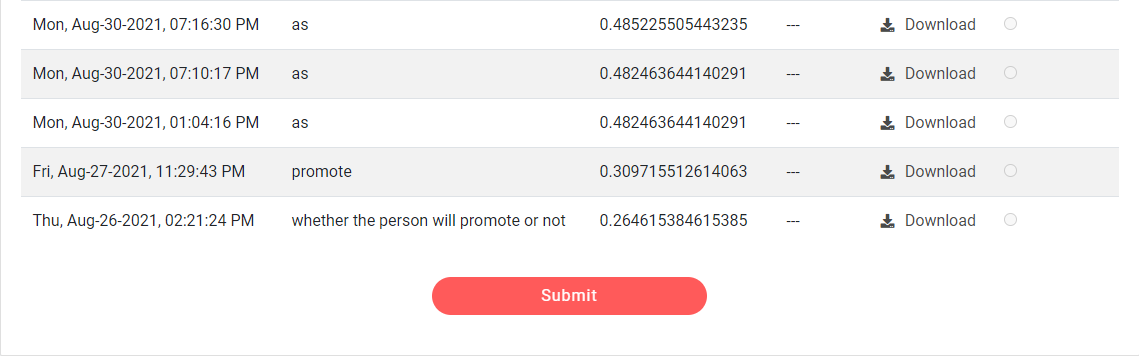